## ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА
### HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

<b>Задачи исследования:</b>

Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
А также ответить на ключевые вопросы HR-агентства:
- <i>Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?</i>
- <i>Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?</i>
- <i>Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?</i>
- <i>Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?</i>

Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

### Загрузка библиотек и данных

In [9]:
# Загрузка библиотек
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms 

import matplotlib.pyplot as plt
import seaborn as sns

# визуальные настройки графиков
sns.set_theme('notebook')
sns.set_palette('Set2')

In [10]:
# Загрузка дата-сета
data = pd.read_csv('data/ds_salaries.csv')

# иследуем дата-сет
data.head(2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


### Описательный анализ данных

In [11]:
# исследуем инормацию о файле: размер, пропуски, типы данных
data.info()

# Дата-сет: 12 столбцов 607 строк, пропущенные значения отсутствуют, 5 столбцов с цифровыми данными и 7 столбцов с категориальными данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### Очистка данных в дата-сете

In [12]:
# Удаление столбца Unnamed по индексу столбца, т.к. он дублирует id строк в дата-сете и будет мешать поиску полных дубликатов в дата-сете
data.drop(data.columns[[0]], axis=1, inplace=True)

In [13]:
# Проверка данных на наличие дубликатов
data_dupl = data[data.duplicated()].shape[0]
data_dupl

# В дата-сете имеется 42 дубликата

42

In [14]:
# Удаляем дубликаты и выводим информацию об обновлённом дата-сете
data = data.drop_duplicates()
display(f"Размер дата-сета после удаления дубликатов {data.shape}")

'Размер дата-сета после удаления дубликатов (565, 11)'

### Анализ распределения заработной платы по всем специальностям

c:\Users\dmitr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


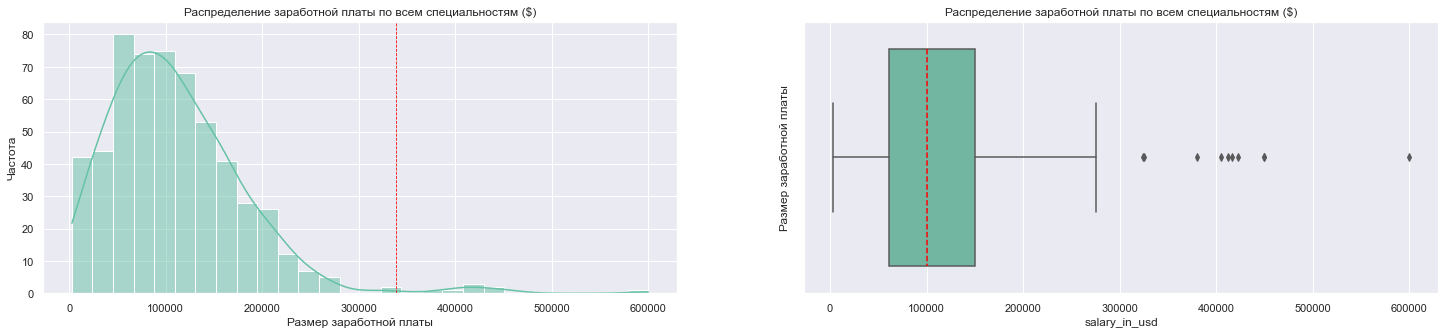

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер заработной платы', ylabel='Частота')
axes[0].set_title('Распределение заработной платы по всем специальностям ($)')
axes[0].axvline(data['salary'].mean(), color='red', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер заработной платы')
axes[1].set_title('Распределение заработной платы по всем специальностям ($)')

plt.show()

In [16]:
# анализ данных по заработной плате 
data['salary_in_usd'].describe().round(0)

count       565.0
mean     110610.0
std       72281.0
min        2859.0
25%       60757.0
50%      100000.0
75%      150000.0
max      600000.0
Name: salary_in_usd, dtype: float64

In [17]:
# находим медиану по заработной плате
data['salary_in_usd'].median()

100000.0

Распределение заработной платы по всем специальностям отлично от нормального
- на гистограмме средняя смещена вправо и равна 110 610 $<br>
- коробчатая диаграмма показывает, что медиана и средняя не совпадают.<br>
Это подтверждает то, что распределение значений отлично от нормального.<br>
Также видны выбросы.

### Анализ данных, которые могут влиять на заработную плату

<AxesSubplot:>

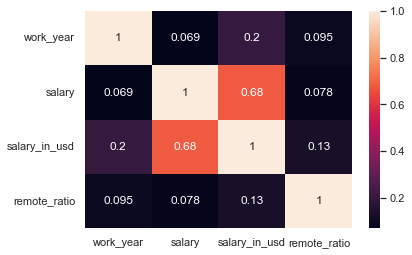

In [18]:
# проведем корреляцию данных по методу Кендалла, т.к. данные распределены ненормально.
sns.heatmap(data.corr(method = 'kendall'), annot = True)

Корреляция показывает, наблюдается слабая связь заработной платы в долларах с годом, когда она была выплачена и сильная связь между заработной платы в долларах и заработной платы общая выплаченная валовая сумма заработной платы.

Создадим функции по определению нормальности данных и верности гипотиз. <br> Зададим alpha = 5%

In [28]:
# функция для принятия решения о нормальности данных
def decision_normality(p):
    print(f"p-value = {p:.3f}")
    if p <= alpha:
        print(f"р-значение меньше, чем заданный уровень значимости {alpha:.2}. Распределение отлично от нормального.")
    else:
        print(f"р-значение больше, чем заданный уровень значимости {alpha:.2}. Распределение является нормальным.")

# функция для принятия решения об отклонении нулевй гипотизы
def decision_gipothesis(p):
    print(f"p-value = {p:.3f}")
    if p <= alpha:
        print(f"р-значение меньше, чем заданный уровень значимости {alpha:.2}. Отвергаем нулевую гипотезу в пользу альтернативной.")
    else:
        print(f"р-значение больше, чем заданный уровень значимости {alpha:.2}. У нас нет оснований отвергнуть нулевую гипотезу.")

# задаем уровень значимости 5%
alpha = 0.05

### Наблюдается ли ежегодный рост зарплат специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): ежегодного роста зарплат специалистов Data Scientist не наблюдается.

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза* ($H_1$): наблюдается статистический ежегодный рост зарплат специалистов Data Scientist.

$$ H_1 : μ_1 > μ_2 > μ_3$$

In [20]:
# создаем дата-сет по должности Data Scientist
data_DS = data[data.job_title == 'Data Scientist']
data_DS['work_year'].value_counts()
# в выборке представлены данны по заработной плате за три года: 2022, 2021, 2020

2022    65
2021    44
2020    21
Name: work_year, dtype: int64

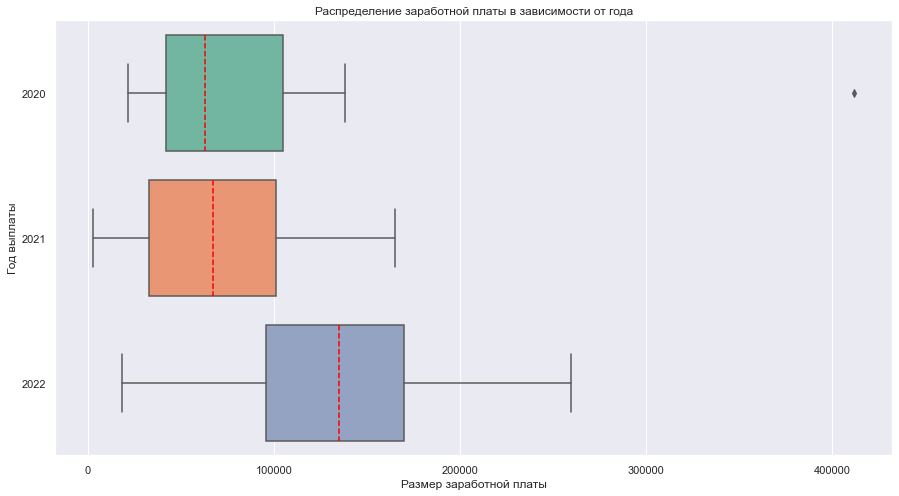

In [21]:
# Строим коробчатые диаграммы распределения заработной платы в зависимости от года
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS, x="salary_in_usd", y="work_year", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Год выплаты')
plt.title('Распределение заработной платы в зависимости от года')
plt.show()

На диаграмме видно, что бокс "2021" незначительно сместилась ввлево относительно бокса "2020", а бокс "2022" значительно сместился вправо относительно боксов "2020" и "2021". Медианы боксов смещаются в каждом последующем боксе правее - это видно также в таблице ниже "Заработная плата в зависимости от года выплаты". <br> Имеется выброс, не будем обращать на него внимание.

In [22]:
data_DS_agg=data_DS.groupby('work_year')['salary_in_usd'].median().round(2)
print('Медиана заработной платы в зависимости от года выплаты')
data_DS_agg

Медиана заработной платы в зависимости от года выплаты


work_year
2020     62726.0
2021     67233.5
2022    135000.0
Name: salary_in_usd, dtype: float64

Предварительный вывод: у специалистов Data Scientist наблюдается ежегодный рост заработной платы. <br> Проверим это предположение с помощью статистических тестов.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [44]:
# значения заработной платы по годам
salary_DS_2020 = data_DS.loc[data_DS['work_year']==2020, 'salary_in_usd']
salary_DS_2021 = data_DS.loc[data_DS['work_year']==2021, 'salary_in_usd']
salary_DS_2022 = data_DS.loc[data_DS['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('\n' + 'Для заработной платы в 2020 году:')
result = stats.shapiro(salary_DS_2020)
decision_normality(result[1])

print('\n' + 'Для заработной платы в 2021 году:')
result = stats.shapiro(salary_DS_2021)
decision_normality(result[1])

print('\n' + 'Для заработной платы в 2022 году:')
result = stats.shapiro(salary_DS_2022)
decision_normality(result[1])


Для заработной платы в 2020 году:
p-value = 0.000
р-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.

Для заработной платы в 2021 году:
p-value = 0.107
р-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.

Для заработной платы в 2022 году:
p-value = 0.676
р-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


In [46]:
salary_DS_2022

292    130000
293     90000
298    136620
299     99360
300    117789
        ...  
559    140400
570    210000
593    150000
598    160000
599    130000
Name: salary_in_usd, Length: 65, dtype: int64

In [ ]:
# для дальнейшего анализа создаём три дата-сета по каждому году отдельно
#data_DS_2020 = data_DS[data_DS.work_year == 2020]
#data_DS_2021 = data_DS[data_DS.work_year == 2021]
#data_DS_2022 = data_DS[data_DS.work_year == 2022]
#data_DS_2022.info()

### Анализ распределения заработной платы для Data Scientist & Data Engineer

In [ ]:
# В дата-сете представлены данные по 50 специальностям. 
display(f"Количество специальностей в дата-сете - {data['job_title'].nunique()}")

# Создадим выборку только для Data Scientist и Data Engineer
data_DS_DE = data[(data.job_title == 'Data Scientist') | (data.job_title == 'Data Engineer')]
data_DS_DE.reset_index(drop=True, inplace=True) # сброс идекса строк
data_DS_DE.info() # В выборке 251 строка, 11 столбцов

'Количество специальностей в дата-сете - 50'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           251 non-null    int64 
 1   experience_level    251 non-null    object
 2   employment_type     251 non-null    object
 3   job_title           251 non-null    object
 4   salary              251 non-null    int64 
 5   salary_currency     251 non-null    object
 6   salary_in_usd       251 non-null    int64 
 7   employee_residence  251 non-null    object
 8   remote_ratio        251 non-null    int64 
 9   company_location    251 non-null    object
 10  company_size        251 non-null    object
dtypes: int64(4), object(7)
memory usage: 21.7+ KB


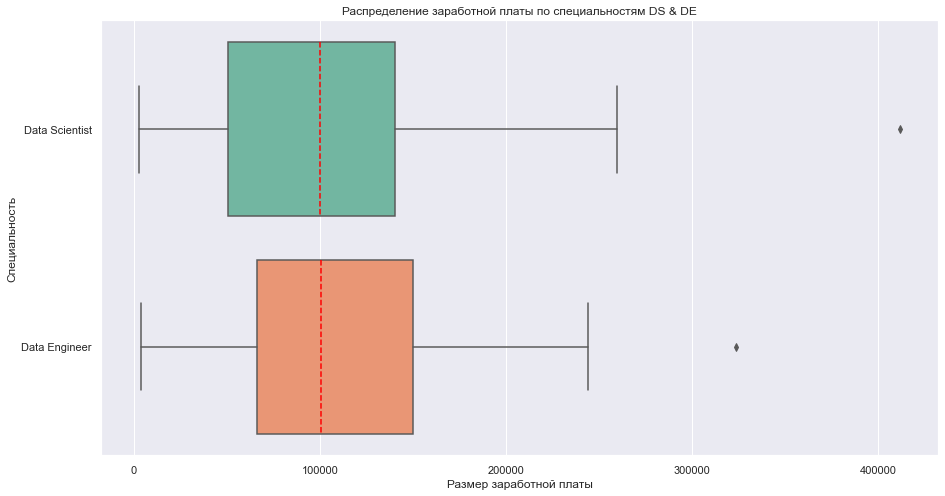

In [ ]:
# Строим коробчатые диаграммы для DS & DE в зависимости от заработной платы
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS_DE, x="salary_in_usd", y="job_title", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Специальность')
plt.title('Распределение заработной платы по специальностям DS & DE')
plt.show()

На диаграмме видно, что коробка DE немного уже и смещена правее, чем коробка DS, однако медианы почти совпали - это видно ниже в таблице "Заработная плата в зависимости от специальности". <br> Имеются выбросы, удалим их.

In [ ]:
data_DS_DE_agg=data_DS_DE.groupby('job_title')['salary_in_usd'].describe().round(2)
print('Заработная плата в зависимости от специальности')
data_DS_DE_agg

Заработная плата в зависимости от специальности


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,121.0,109750.03,58203.68,4000.0,66022.00,100800.0,150000.0,324000.0
Data Scientist,130.0,103336.35,63967.56,2859.0,50330.25,100000.0,140400.0,412000.0


Удаление выбросов

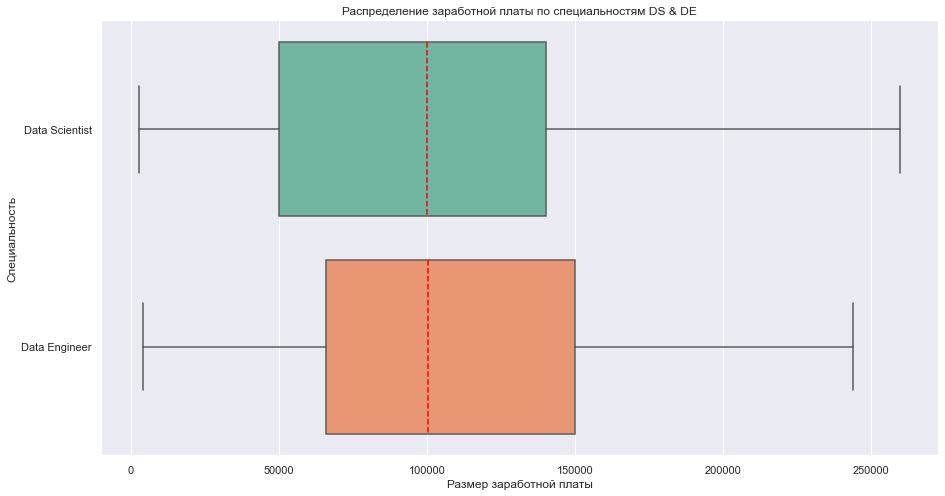

In [ ]:
# удалим записи, где заработная плата в долларах больше 300 тыс.$
data_DS_DE = data_DS_DE[data_DS_DE['salary_in_usd'] < 3e+05]

# Строим коробчатые диаграммы для DS & DE в зависимости от
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS_DE, x="salary_in_usd", y="job_title", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Специальность')
plt.title('Распределение заработной платы по специальностям DS & DE')
plt.show()

Диаграммы не изменились, но выбросы удалены.

In [ ]:
data_DS_DE.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
2,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
3,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
4,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M


In [ ]:
data_DS_DE["experience_level"].value_counts()

MI    110
SE    102
EN     34
EX      3
Name: experience_level, dtype: int64

Тестирование

In [ ]:
#df['col'] = df['col'].apply ( lambda x: ' value1 ' if x < 20 else ' value2')

data_DS_DE['job_title'] = data_DS_DE['job_title'].apply (lambda x: 'DS' if x == 'Data Scientist' else 'DE')

In [ ]:
data_DS_DE["job_title"].value_counts()

DS    129
DE    120
Name: job_title, dtype: int64

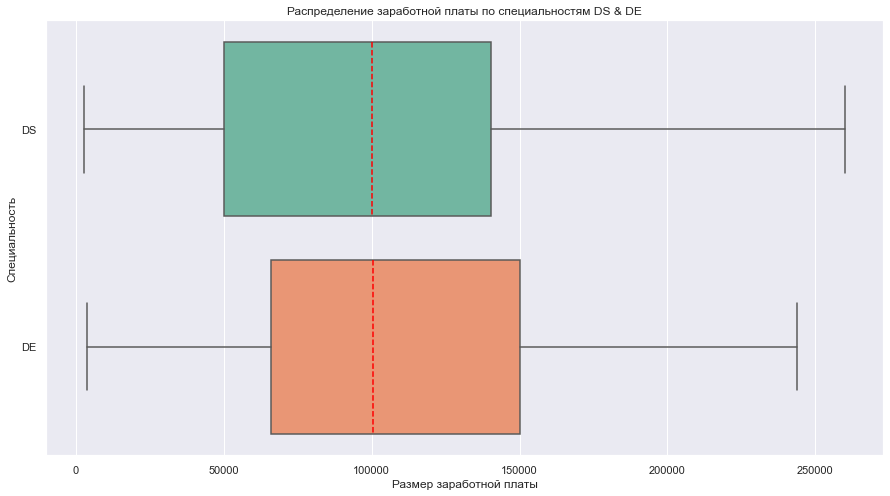

In [ ]:
# Строим коробчатые диаграммы для DS & DE
plt.figure(figsize=(15, 8))
ax = sns.boxplot(data=data_DS_DE, x="salary_in_usd", y="job_title", orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер заработной платы', ylabel='Специальность')
plt.title('Распределение заработной платы по специальностям DS & DE')
plt.show()

In [ ]:
display(data['job_title'].nunique())

50

In [ ]:
ds = data[data['job_title'] == 'Data Engineer']
ds

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
35,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L
43,2020,MI,FT,Data Engineer,106000,USD,106000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...
579,2022,SE,FT,Data Engineer,25000,USD,25000,US,100,US,M
582,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
583,2022,SE,FT,Data Engineer,160080,USD,160080,US,100,US,M
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
